In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Dataset
Historical Wildfires

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found here.

Variables

- Region: the 7 regions<br>
- Date: in UTC and provide the data for 24 hours ahead<br>
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2<br>
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin<br>
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts<br>
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%<br>
- Std_confidence: standard deviation of estimated fire radiative power in megawatts<br>
- Var_confidence: Variance of estimated fire radiative power in megawatts<br>
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region<br>
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations

In [3]:
df = pd.read_csv('/Users/thuytrang/Documents/projects/dashboards-plotly/raw-data/historical_Wildfires.csv')
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [4]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


Let's verify the column names and the data type of each variable


In [5]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [6]:
#data type
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns


In [7]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

**Verify the columns again**


In [8]:
#verify the columns again
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

## Practice Tasks


### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


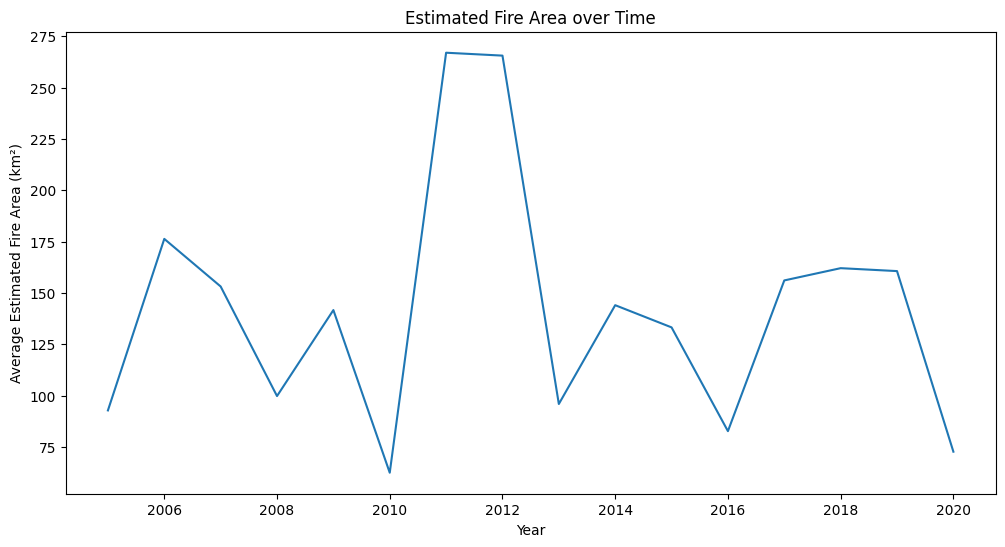

In [9]:
# TODO
plt.figure(figsize=(12, 6))
df_year = df.groupby("Year")['Estimated_fire_area'].mean()
df_year.plot(x=df_year.index, y=df_year.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
    plt.figure(figsize=(12, 6))
    # Grouping the data by 'Year' and calculating the mean of 'Estimated_fire_area'
    df_new = df.groupby('Year')['Estimated_fire_area'].mean()
    # Plotting the data
    df_new.plot(x=df_new.index, y=df_new.values)
    plt.xlabel('Year')
    plt.ylabel('Average Estimated Fire Area (km²)')
    plt.title('Estimated Fire Area over Time')
    plt.show()
```

</details>


---


Text(0.5, 1.0, 'Estimated fire area for month')

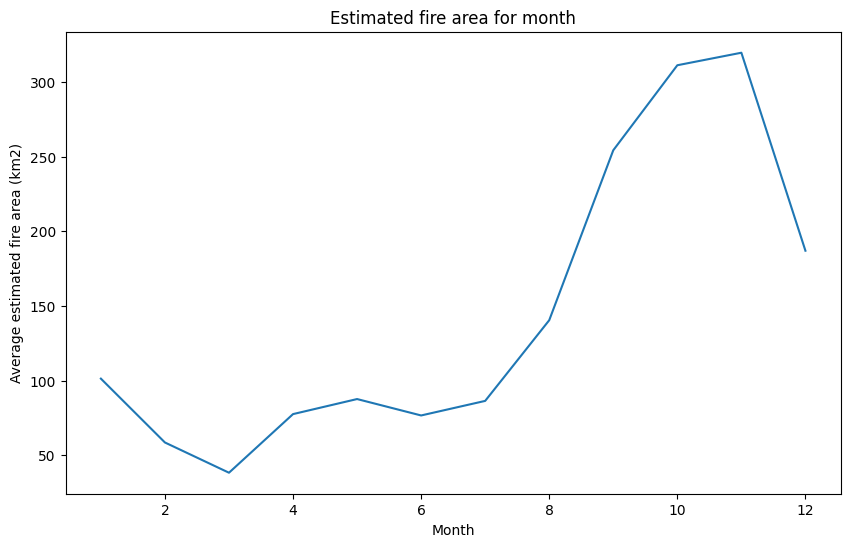

In [10]:
# TODO
plt.figure(figsize=(10,6))
#df_moth = df["Year"=]
df_month = df.groupby("Month")["Estimated_fire_area"].mean()
df_month.plot(x=df_month.index,y=df_month.values)
plt.xlabel('Month')
plt.ylabel('Average estimated fire area (km2)')
plt.title('Estimated fire area for month')

This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia


### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot

before starting with the plot, why not know the regions mentioned in the dataset?. <br>Make use of unique() to identify the regions in the dataset (apply it on series only)



In [11]:
df["Region"].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

In [12]:
type(df["Mean_estimated_fire_brightness"])

pandas.core.series.Series

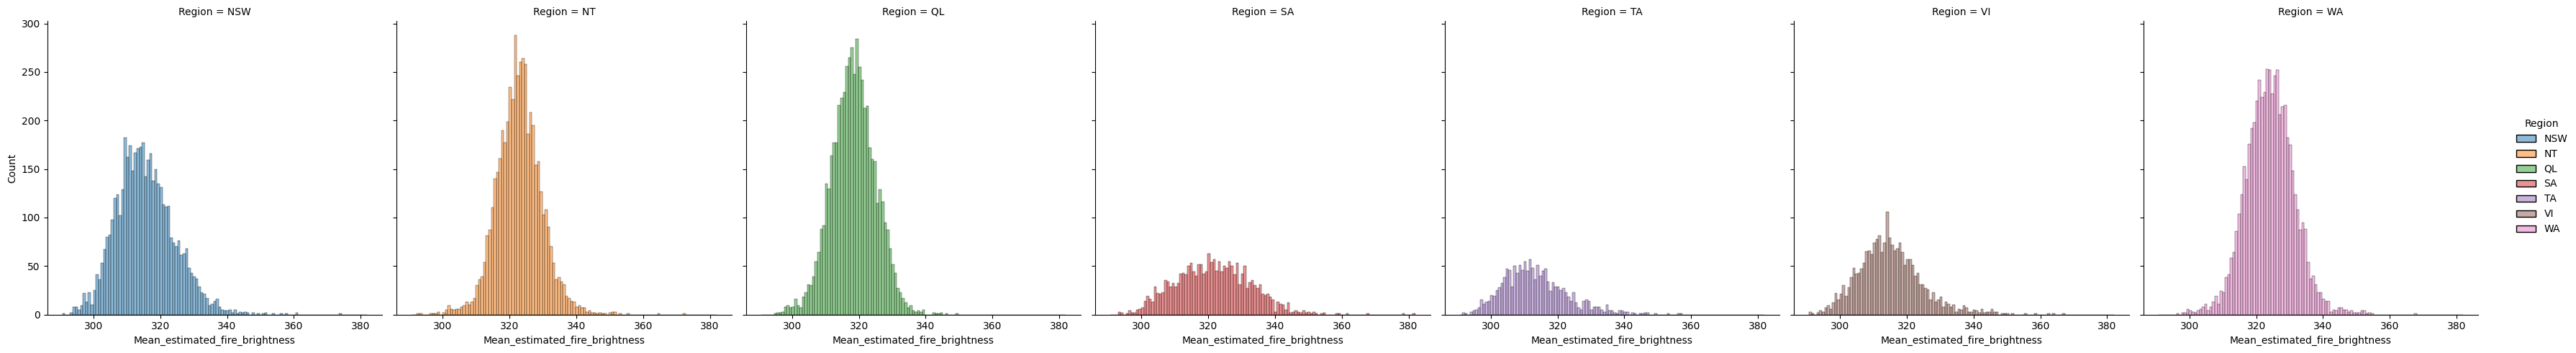

In [13]:
sns.displot(data = df, x ="Mean_estimated_fire_brightness", hue = "Region", col = "Region")

<details>
    <summary>Click here for Solution</summary>

```python
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6))
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()
```
</details>


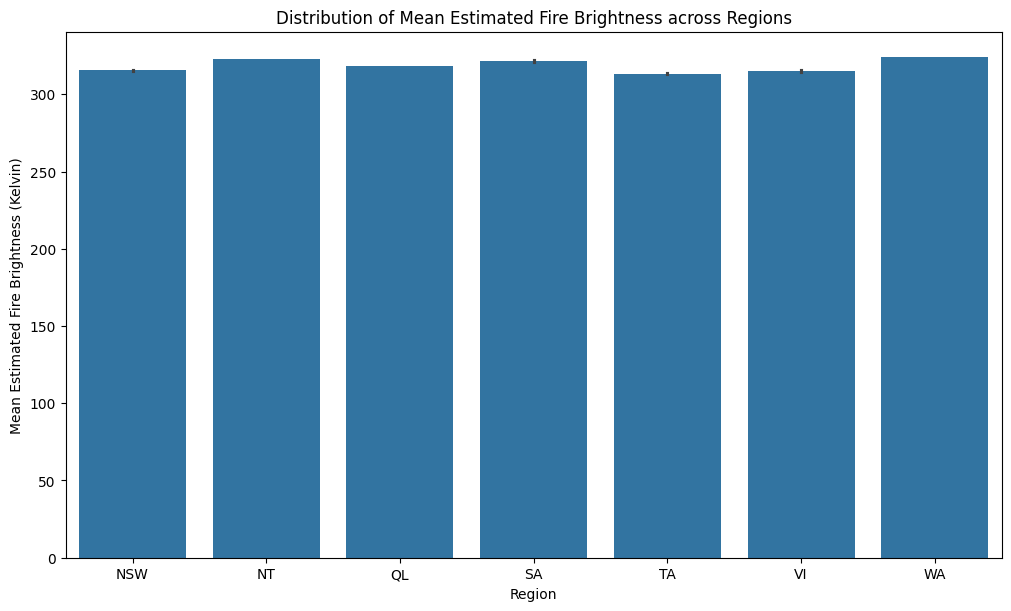

In [14]:
# Creating a bar plot using seaborn to visualize the distribution of mean estimated fire brightness across regions
plt.figure(figsize=(10, 6), layout = 'compressed')
# Using seaborn's barplot function to create the plot
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions<br> we will develop a pie chart for this


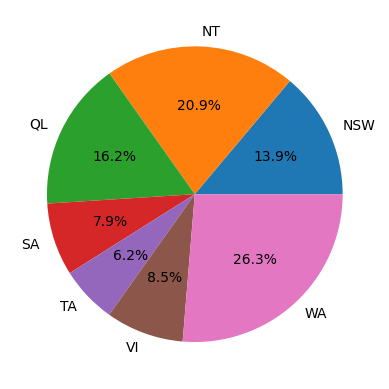

In [39]:
# make the data
df_pie = df.groupby("Region")["Mean_estimated_fire_radiative_power"].sum()
cat = df_pie.index
value = df_pie.values
# plot
fig, ax = plt.subplots()
ax.pie(x = value , labels=cat, autopct='%1.1f%%')
plt.show()